# 01 - YOLO MVP Caries (Roboflow)

Objectif :
- Télécharger un dataset dentaire depuis Roboflow (format YOLOv8)
- Fine-tuner un YOLOv8n
- Tester des prédictions sur quelques images
- Préparer une sortie JSON compatible avec l'app


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
!pip install ultralytics roboflow -q

import torch
print("Torch version:", torch.__version__)
print("GPU dispo :", torch.cuda.is_available())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 126.3 MB/s eta 0:00:00
Torch version: 2.9.0+cu126
GPU dispo : True


In [ ]:
from ultralytics import YOLO
from roboflow import Roboflow
from pathlib import Path
import os
from IPython.display import Image, display
import json

# Répertoire de travail principal pour le dataset
BASE_DIR = Path("/content")
PROJECT_DIR = BASE_DIR / "caries_yolo_roboflow"
PROJECT_DIR.mkdir(exist_ok=True, parents=True)

print(f"PROJECT_DIR : {PROJECT_DIR}")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
PROJECT_DIR : /content/caries_yolo_roboflow


In [ ]:
# ⚠️ Remplace par ta vraie API key Roboflow
ROBOFLOW_API_KEY = "C2NEaG8iYyxDa4dN6QDT"
ROBOFLOW_WORKSPACE = "yacine-project-j9mh3"      # ex: "myworkspace"
ROBOFLOW_PROJECT   = "tooth_2-_for_testing34-ezj8d"  # ex: "dental-caries-detection"
ROBOFLOW_VERSION   = 1                    # ex: 1, 2, ...

rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace(ROBOFLOW_WORKSPACE).project(ROBOFLOW_PROJECT)
dataset = project.version(ROBOFLOW_VERSION).download("yolov8")

DATASET_PATH = Path(dataset.location)  # chemin où Roboflow a mis le dataset
DATASET_PATH

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to tooth_2-_for_testing34-1 in yolov8:: 100%|██████████| 4390/4390 [00:00<00:00, 8587.14it/s]


PosixPath('/content/tooth_2-_for_testing34-1')

Contenu dataset : ['train', 'valid', 'README.dataset.txt', 'data.yaml', 'README.roboflow.txt', 'test']

data.yaml :
names:
- decay
nc: 1
roboflow:
  license: CC BY 4.0
  project: tooth_2-_for_testing34-ezj8d
  url: https://universe.roboflow.com/yacine-project-j9mh3/tooth_2-_for_testing34-ezj8d/dataset/1
  version: 1
  workspace: yacine-project-j9mh3
test: ../test/images
train: ../train/images
val: ../valid/images


Exemple d'image : /content/tooth_2-_for_testing34-1/train/images/194_jpg.rf.2f83b4611daaa4c0ec90b4117bcc85ae.jpg


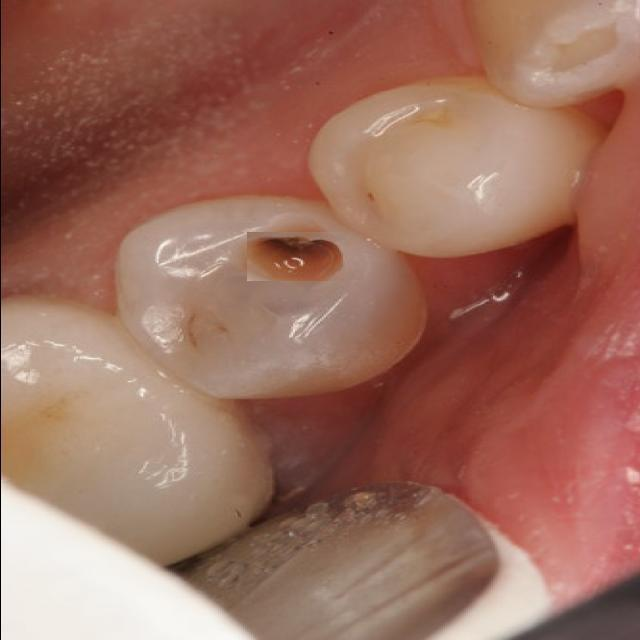

In [ ]:
# Afficher le contenu du dossier
print("Contenu dataset :", os.listdir(DATASET_PATH))

# Afficher le fichier data.yaml (Roboflow le fournit souvent déjà prêt)
data_yaml_path = DATASET_PATH / "data.yaml"
print("\ndata.yaml :")
print(data_yaml_path.read_text())

# Afficher une image de train
sample_img = next((DATASET_PATH / "train").glob("*.jpg"), None)
if sample_img is None:
    sample_img = next((DATASET_PATH / "train/images").glob("*.jpg"), None)

print("\nExemple d'image :", sample_img)
display(Image(filename=str(sample_img)))


In [ ]:
# Charger un modèle YOLOv8n pré-entraîné sur COCO
model = YOLO("yolov8n.pt")

In [ ]:
type(model)

ultralytics.models.yolo.model.YOLO

In [ ]:
model.task

'detect'

In [ ]:
data_yaml_path

PosixPath('/content/tooth_2-_for_testing34-1/data.yaml')

In [ ]:
# Chemin vers le data.yaml du dataset Roboflow
DATA_YAML = str(data_yaml_path)

# Fine-tuning
results = model.train(
    data=DATA_YAML,
    epochs=50,      # tu peux commencer à 20 pour aller vite
    imgsz=640,
    batch=16,
    project=str(PROJECT_DIR / "runs"),
    name="yolov8n_caries",
    verbose=True
)

Ultralytics 8.3.243 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/tooth_2-_for_testing34-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n_caries, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective

Exception in thread Thread-9 (_pin_memory_loop):
Traceback (most recent call last):
  File "/usr/lib/python3.12/threading.py", line 1075, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.12/threading.py", line 1012, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/_utils/pin_memory.py", line 52, in _pin_memory_loop
    do_one_step()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/_utils/pin_memory.py", line 28, in do_one_step
    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/torch/multiprocessing/reductions.py", line 541, in rebuild_storage_fd
    fd = df.detach()
         ^^^^^^^^^^^
  File "/usr/lib/python3.12/multiprocessing/resource_s

KeyboardInterrupt: 

In [ ]:
# Récupérer le dossier de run
runs_dir = PROJECT_DIR / "runs"
print("Runs existants :", os.listdir(runs_dir))

# Adapte si le nom est différent (ex: "yolov8n_caries2")
run_name = "yolov8n_caries"
best_weights = runs_dir / run_name / "weights" / "best.pt"
print("Best weights :", best_weights)


Runs existants : ['yolov8n_caries']
Best weights : /content/caries_yolo_roboflow/runs/yolov8n_caries/weights/best.pt


In [ ]:
model_path = "/content/caries_yolo_roboflow/runs/yolov8n_caries/weights/best.pt"
data_yaml  = "/content/tooth_2-_for_testing34-1/data.yaml"

model = YOLO(model_path)

metrics = model.val(
    data=data_yaml,
    split="test"   # utilise la clé 'test' du data.yaml
)

m = metrics.results_dict

print(
    f"all 206 images 512 instances "
    f"Box(P {m['metrics/precision(B)']:.3f} "
    f"R {m['metrics/recall(B)']:.3f} "
    f"mAP50 {m['metrics/mAP50(B)']:.3f} "
    f"mAP50-95 {m['metrics/mAP50-95(B)']:.3f})"
)

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 670.8±198.6 MB/s, size: 30.8 KB)
val: Scanning /content/tooth_2-_for_testing34-1/test/labels.cache... 206 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 206/206 184.9Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 13/13 3.9it/s 3.4s
                   all        206        512      0.805      0.742      0.802      0.524
Speed: 2.4ms preprocess, 4.8ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to /content/runs/detect/val3
all 206 images 512 instances Box(P 0.805 R 0.742 mAP50 0.802 mAP50-95 0.524)


Image : 554_jpg.rf.95ec63290b709651859a80df1cfe2c3a.jpg
Label : 554_jpg.rf.95ec63290b709651859a80df1cfe2c3a.txt

image 1/1 /content/tooth_2-_for_testing34-1/test/images/554_jpg.rf.95ec63290b709651859a80df1cfe2c3a.jpg: 640x640 2 decays, 8.3ms
Speed: 1.7ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


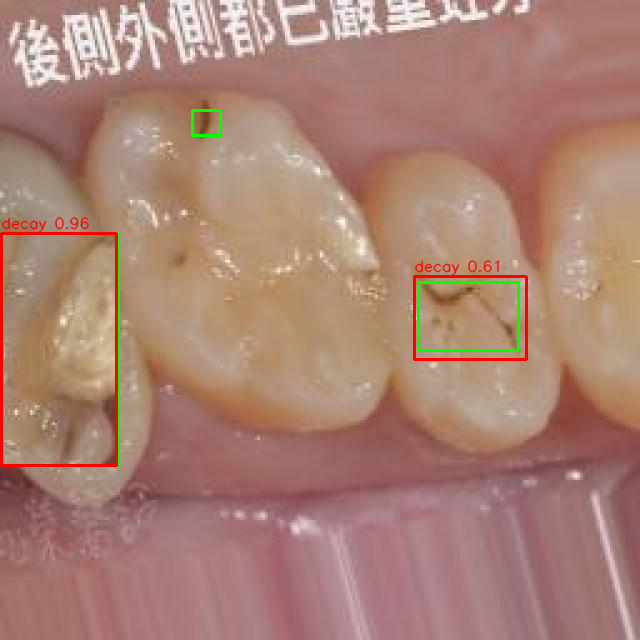

In [ ]:
import cv2
import numpy as np
from pathlib import Path
from IPython.display import display, Image as IPyImage

root = Path("/content/tooth_2-_for_testing34-1")
test_img_dir   = root / "test/images"
test_label_dir = root / "test/labels"

# 1) choisir une image de test
img_path = next(test_img_dir.glob("*.jpg"))  # ou .png selon ton dataset
label_path = test_label_dir / (img_path.stem + ".txt")

print("Image :", img_path.name)
print("Label :", label_path.name)

# 2) charger l'image
img = cv2.imread(str(img_path))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w, _ = img.shape

# copie pour affichage pred+GT
vis = img.copy()

# 3) dessiner les GT (en VERT)
if label_path.exists():
    with open(label_path) as f:
        for line in f:
            cls_id, xc, yc, bw, bh = map(float, line.strip().split())
            x_c, y_c = xc * w, yc * h
            bw_px, bh_px = bw * w, bh * h
            x1 = int(x_c - bw_px / 2)
            y1 = int(y_c - bh_px / 2)
            x2 = int(x_c + bw_px / 2)
            y2 = int(y_c + bh_px / 2)
            cv2.rectangle(vis, (x1, y1), (x2, y2), (0, 255, 0), 2)  # vert GT

# 4) prédictions YOLO (en ROUGE)
results = model(str(img_path))

for box in results[0].boxes:
    x1, y1, x2, y2 = box.xyxy[0].tolist()
    conf = float(box.conf[0].item())
    cls  = int(box.cls[0].item())
    label = results[0].names[cls]
    cv2.rectangle(vis,
                  (int(x1), int(y1)),
                  (int(x2), int(y2)),
                  (255, 0, 0), 2)  # rouge prédiction
    cv2.putText(vis,
                f"{label} {conf:.2f}",
                (int(x1), int(y1) - 5),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.5,
                (255, 0, 0),
                1,
                cv2.LINE_AA)

# 5) afficher le résultat
_, buf = cv2.imencode(".png", cv2.cvtColor(vis, cv2.COLOR_RGB2BGR))
display(IPyImage(data=buf.tobytes()))